# MUSHROOM CLASSIFICATION

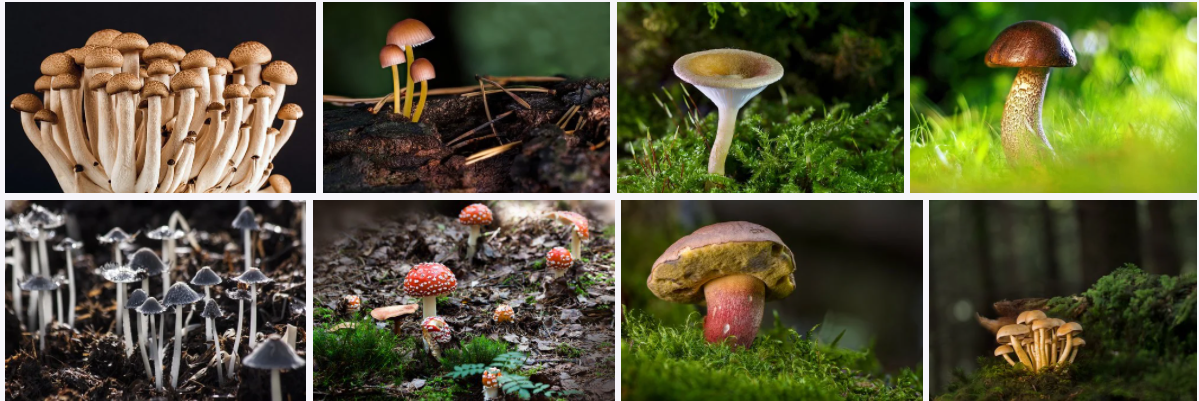

**Submitted by Subham Patel**

## Problem Statment

*****The overarching objective of this project is to develop a robust and accurate machine learning model capable of predicting the edibility status of mushrooms, discerning between poisonous and edible varieties, leveraging a comprehensive set of features that encapsulate various attributes such as cap shape, cap surface, gill characteristics, stem dimensions, veil properties, and spore print color. Through extensive analysis and predictive modeling, the goal is to create a reliable tool for differentiating between mushroom types, ensuring the safety of individuals engaging in mushroom foraging or related activities.*****

## Goal & objectives
###### 1. This exercise aims to build a model, using historical data that will determine the class of mushroom.
######  2. To analyze the mushroom types and ensuring the safety of indivisual enganging in mushroom foraging or related activities.

## Process which  has been followed:-

#### 1. Gathering Data
#### 2. Understanding the ProblemStatement
#### 3. Preprocessing 
#### 4. EDA
#### 5. Model-Building 
#### 6. Prediction & Evaluation
#### 7. Conclusion 

In [1]:
import os
check=os.getcwd()
check

'C:\\Users\\lenovo'

### Importing neccesary libaries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")necc

In [3]:
#Setting the option to see all columns 
pd.set_option('display.max_columns',None)

In [268]:
##Reading & Loading the both dataset with help of Pandas
data=pd.read_csv("Downloads/Data.csv")

In [275]:
#Loading the second dataset
data2=pd.read_csv("Downloads/Data 2.csv")

  * **Title** - **Description**
    * **Class** - Target variable indicating whether the mushroom is poisonous  or edible.
    * **Cap-diameter** - Diameter of the mushroom cap!.
    * **Cap-shape** - Shape of the mushroom cap.
    * **Cap-surface** -The surface texture of the mushroom cap.
    * **Cap color** - The color of the mushroom cap.
    * **Does-bruise-or-bleed** - Whether the mushroom bruises or bleeds.
    * **Gill-attachment** -Attachment type of the gills.
    * **Gill- Spacing** - Spacing between gills.
    * **Gill-Color** - Color of the gills.
    * **Stem-height** - Height of the mushroom stem.
    * **Stem-Width** - Width of the mushroom stem.
    * **Stem-Root** - Root type of the mushroom stem.
    * **Stem-Surface** - Surface texture of the mushroom stem.    
    * **Stem-Color** - Color of the mushroom stem.
    * **Veil-Type** - Type of veil covering the gills  
    * **Veil-Color** - Color of the veil.
    * **has-ring** - Whether the mushroom has a ring.
    * **Ring-Type** - Type of ring on the mushroom.
    * **Spore-Print-Color** - Color of the spore print.
    * **Habitat** - Habitat where the mushroom is found.
    * **Season** - Season in which the mushroom is found.

### Basic  EDA

In [273]:
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


In [276]:
data2.head()

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
0,Amanita Family,Fly Agaric,p,[10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Amanita Family,Panther Cap,p,[5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Amanita Family,False Panther Cap,p,[10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Amanita Family,The Blusher,e,[5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Amanita Family,Death Cap,p,[5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### In data2 there are some unwanted noise with cap-diameter which we have to clean before merging

In [271]:
data.shape

(61069, 21)

In [272]:
data2.shape

(173, 23)

In [265]:
data.duplicated().count()

7

In [270]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [277]:
data2.isnull().sum()*100/len(data2)

family                    0.000000
name                      0.000000
class                     0.000000
cap-diameter              0.000000
cap-shape                99.421965
Cap-surface              99.421965
cap-color                99.421965
does-bruise-or-bleed     99.421965
gill-attachment          99.421965
gill-spacing            100.000000
gill-color               99.421965
stem-height              99.421965
stem-width              100.000000
stem-root               100.000000
stem-surface            100.000000
stem-color              100.000000
veil-type               100.000000
veil-color              100.000000
has-ring                100.000000
ring-type               100.000000
Spore-print-color       100.000000
habitat                 100.000000
season                  100.000000
dtype: float64

######  From the dataset(data2) ,we can observe that all values of columns are empty except Family,Name & Class. We will take care of it in later  stage.

In [18]:
data.isnull().sum()*100/len(df)

class                    0.000000
cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.056073
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         16.139251
gill-spacing            40.924529
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000
stem-root               84.154665
stem-surface            62.251396
stem-color               0.000000
veil-type               94.529898
veil-color              87.613076
has-ring                 0.000000
ring-type                4.034813
spore-print-color       89.342281
habitat                  0.000000
season                   0.000000
dtype: float64

###### So many missing values can be observed from the data(dataset) for which we will we imputation technique to fill and will drop few as per further analaysis. 

In [283]:
check=data2['family'].value_counts()
print(check)
print("Total no of Family in the dataset :",check.shape)

Tricholoma Family         43
Russula Family            27
Bolete Family             14
Ink Cap Family            13
Cortinarius Family        11
Stropharia Family          8
Amanita Family             8
Wax Gill Family            8
Entoloma Family            7
Bracket Fungi              7
Mushroom Family            5
Bolbitius Family           3
Lepiota Family             3
Paxillus Family            3
Chanterelle Family         3
Pluteus Family             2
Oyster Mushroom Family     2
Crepidotus Family          1
Hydnum Family              1
Ear-Pick Family            1
Saddle-Cup Family          1
Morel Family               1
Jelly Discs Family         1
Name: family, dtype: int64
Total no of Family in the dataset : (23,)


###### Overall 23 types  of mushroom's family names are provied and "Tricholoma Family" type has maximum occurance

In [21]:
data.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [284]:
data.describe(include="O")
##Stats table for object data-tyes

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,61069,61069,46949,61069,61069,51185,36006,61069,9531,22945,61069,3177,7413,61069,58598,6354,61069,61069
unique,2,7,11,12,2,7,3,12,5,8,13,1,6,2,8,7,8,4
top,p,x,t,n,f,a,c,w,s,s,w,u,w,f,f,k,d,a
freq,33888,26934,8196,24218,50479,12698,24710,18521,3177,6025,22926,3177,5474,45890,48361,2118,44209,30177


In [22]:
data2.describe()

,gill-spacing,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***In Data2 ,there are so missing values except Familt,Class ,Name.***

### Data Cleaning

In [285]:
##Removing the '[',']' from the numeric part
data2['cap-diameter'] = data2['cap-diameter'].str.replace("\[", "", regex=True)
 
data2['cap-diameter'] = data2['cap-diameter'].str.replace("\]", "", regex=True)
 

In [286]:
data2['cap-diameter']=pd.to_numeric(data2['cap-diameter'])## Now converting object type to int type

In [287]:
##Renaming the columns name
data2=data2.rename(columns={'Cap-surface':'cap-surface'})

In [288]:
data2.head(166)

,family,name,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
0,Amanita Family,Fly Agaric,p,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Amanita Family,Panther Cap,p,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Amanita Family,False Panther Cap,p,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Amanita Family,The Blusher,e,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Amanita Family,Death Cap,p,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Hydnum Family,Hedgehog Fungus,e,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,Ear-Pick Family,Ear-pick Fungus,p,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,Bracket Fungi,Hairy Stereum,p,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,Bracket Fungi,Silver Leaf Fungus,p,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Mergin both Datasets(Data & Data2)

In [412]:
mushroom= pd.merge(left=data, right=data2, how='outer', on=['cap-diameter','class','cap-surface','cap-shape','cap-color'])

In [413]:
mushroom.shape

(61242, 39)

In [31]:
#mushroom.to_excel("mush.xlsx")
##saved this excel file for my reference

In [32]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61242 entries, 0 to 61241
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   class                   61242 non-null  object 
 1   cap-diameter            61242 non-null  float64
 2   cap-shape               61070 non-null  object 
 3   cap-surface             46950 non-null  object 
 4   cap-color               61070 non-null  object 
 5   does-bruise-or-bleed_x  61069 non-null  object 
 6   gill-attachment_x       51185 non-null  object 
 7   gill-spacing_x          36006 non-null  object 
 8   gill-color_x            61069 non-null  object 
 9   stem-height_x           61069 non-null  float64
 10  stem-width_x            61069 non-null  float64
 11  stem-root_x             9531 non-null   object 
 12  stem-surface_x          22945 non-null  object 
 13  stem-color_x            61069 non-null  object 
 14  veil-type_x             3177 non-null 

In [291]:
mushroom.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed_x,gill-attachment_x,gill-spacing_x,gill-color_x,stem-height_x,stem-width_x,stem-root_x,stem-surface_x,stem-color_x,veil-type_x,veil-color_x,has-ring_x,ring-type_x,spore-print-color,habitat_x,season_x,family,name,does-bruise-or-bleed_y,gill-attachment_y,gill-spacing_y,gill-color_y,stem-height_y,stem-width_y,stem-root_y,stem-surface_y,stem-color_y,veil-type_y,veil-color_y,has-ring_y,ring-type_y,Spore-print-color,habitat_y,season_y
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,p,15.26,x,g,o,f,e,NaN,w,18.99,18.03,s,y,w,u,w,t,p,NaN,d,w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***We can observe after merging repeated column has been generated in where we have to drop the unneccessary columns where there are missing values.***

In [34]:
mushroom.isnull().sum()*100/len(mushroom)

class                       0.000000
cap-diameter                0.000000
cap-shape                   0.280853
cap-surface                23.336926
cap-color                   0.280853
does-bruise-or-bleed_x      0.282486
gill-attachment_x          16.421737
gill-spacing_x             41.207015
gill-color_x                0.282486
stem-height_x               0.282486
stem-width_x                0.282486
stem-root_x                84.437151
stem-surface_x             62.533882
stem-color_x                0.282486
veil-type_x                94.812384
veil-color_x               87.895562
has-ring_x                  0.282486
ring-type_x                 4.317299
spore-print-color          89.624767
habitat_x                   0.282486
season_x                    0.282486
family                     99.717514
name                       99.717514
does-bruise-or-bleed_y     99.998367
gill-attachment_y          99.998367
gill-spacing_y            100.000000
gill-color_y               99.998367
s

##### Dropping the columns which are nt carrying any data :-

In [414]:
mushroom.drop(['season_y','does-bruise-or-bleed_y',
       'gill-attachment_y', 'gill-spacing_y', 'gill-color_y', 'stem-height_y',
       'stem-width_y', 'stem-root_y', 'stem-surface_y', 'stem-color_y',
       'veil-type_y', 'veil-color_y', 'has-ring_y', 'ring-type_y',
       'Spore-print-color', 'habitat_y'],axis=1,inplace=True)

In [415]:
mushroom.shape

(61242, 23)

###### Renaming Columns Name :-

In [416]:

mushroom=mushroom.rename(columns={'Cap-surface':'cap-surface','does-bruise-or-bleed_x':'does-bruise-or-bleed',
                                  'gill-attachment_x':'gill-attachment','gill-spacing_x':'gill-spacing',
                                  'gill-color_x':'gill-color','stem-height_x ':'stem-height','stem-width_x':'stem-width',
                                  'stem-root_x':'stem-root','stem-surface_x':'stem-surface','stem-color_x':'stem-color',
                                  'veil-type_x':'veil-type','habitat_x ':'habitat','season_x':'season'
                                 })

In [417]:
mushroom=mushroom.rename(columns={'stem-height_x':'stem-height','veil-color_x':'veil-color','ring-type_x ':'ring-type',
                                  'habitat_x':'habitat','has-ring_x':'has-ring','ring-type_x':'ring-type'})
                                  


In [298]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61242 entries, 0 to 61241
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61242 non-null  object 
 1   cap-diameter          61242 non-null  float64
 2   cap-shape             61070 non-null  object 
 3   cap-surface           46950 non-null  object 
 4   cap-color             61070 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

## Explarotary Data Analysis(EDA)

#### Using Pandas Profiling to get insights

In [43]:
##EDA-Pandas profiling
#from pandas_profiling import ProfileReport

#mushpro = ProfileReport(mushroom, title="Pandas Profiling Report", explorative=True)

#mushpro.to_file("mush-pro-output_report.html")

In [301]:
mushroom.duplicated().count()

61242

****Giving some meaning full names to the attributes****

In [418]:
mushroom['class']=mushroom['class'].replace({'p':'Poisonous ','e':'Edible'})
mushroom['cap-shape']=mushroom['cap-shape'].replace({'[o]':'Others','b':'Bell','c':'Conical','x':'Convex','f':'Float','s':'Sunken','p':'Spherical','o':'Others'})
mushroom['cap-surface']=mushroom['cap-surface'].replace({'[y]':'Others','i':'Fibrous','s':'Smooth','k':'Silky','e':'Fleshy','g':'Grooves','h':'Shiny','t':'Sticky','y':'Scaly','l':'Lethery','w':'Wrinkled'})
mushroom['cap-color']=mushroom['cap-color'].replace({'[y]':'Others','y':'Yellow','w':'White','f':'Others','n':'Brown','r':'Green','b':'Buff','g':'Grey','p':'Pink','e':'Red','k':'Black','l':'Blue','u':'Purple','o':'Orange'})
mushroom['does-bruise-or-bleed']=mushroom['does-bruise-or-bleed'].replace({'f':'No','t':'Yes'})
mushroom['gill-attachment']=mushroom['gill-attachment'].replace({'a':'Adnate','x':'Adnexed','d':'Decurrent','e':'Free','s':'Sinuate','p':'Pores','f':'No Gill'})
mushroom['gill-spacing']=mushroom['gill-spacing'].replace({'c':'Close','d':'Distant','f':'No Gill'})
mushroom['gill-color']=mushroom['gill-color'].replace({'y':'Yellow','w':'White','f':'No Gill','n':'Brown','r':'Green','b':'Buff','g':'Grey','p':'Pink','e':'Red','k':'Black','l':'Blue','u':'Purple','o':'Orange'})
mushroom['stem-root']=mushroom['stem-root'].replace({'f':'Others','b':'Bulbous','s':'Swollen','c':'Club','u':'Cup','e':'Equal','z':'Rhizomorphs','r':'Rooted'})
mushroom['stem-surface']=mushroom['stem-surface'].replace({'i':'Fibrous','s':'Smooth','k':'Silky','e':'Fleshy','g':'Grooves','h':'Shiny','t':'Sticky','y':'Scaly','l':'Lethery','w':"Wrinkled"})
mushroom['veil-type']=mushroom['veil-type'].replace({'p':'Partial','u':'Universal'})
mushroom['veil-color']=mushroom['veil-color'].replace({'y':'Yellow','w':'White','f':'Others','n':'Brown','r':'Green','b':'Buff','g':'Grey','p':'Pink','e':'Red','k':'Black','l':'Blue','u':'Purple','o':'Orange','f':'Other'})
mushroom['has-ring']=mushroom['has-ring'].replace({'t':'Ring','f':'No-Ring'})
mushroom['ring-type']=mushroom['ring-type'].replace({'c':'Cobwebby','e':'Evanescent','r':'Flaring','g':'Grooved','l':'Large','p':'pendant','s':'Sheating','z':'Zone','y':'Scaly','m':'Movable','f':'No Ring'})
mushroom['spore-print-color']=mushroom['spore-print-color'].replace({'n':'Brown','r':'Green','b':'Buff','g':'Grey','p':'Pink','e':'Red','k':'Black','l':'Blue','u':'Purple','o':'Orange','w':'White'})
mushroom['habitat']=mushroom['habitat'].replace({'g':'Grasses','l':'Leaves','m':'Meadwos','p':'Paths','h':'Heaths','u':'Urban','w':'Urban','w':'Waste','d':'Woods'})
mushroom['season']=mushroom['season'].replace({'s':'Spring','u':'Summer','a':'Autumn','w':'Winter'})
mushroom['stem-color']=mushroom['stem-color'].replace({'y':'Yellow','w':'White','f':'Others','n':'Brown','r':'Green','b':'Buff','g':'Grey','p':'Pink','e':'Red','k':'Black','l':'Blue','u':'Purple','o':'Orange'})
mushroom['ring-type']=mushroom['ring-type'].replace({'c':'Cobwebby','e':'Evanescent','r':'Flaring','g':'Grooved','l':'Large','p':'pendant','s':'Sheating','z':'Zone','y':'Scaly','m':'Movable','f':'No Ring'})

In [315]:
#mushroom['ring-type']=mushroom['ring-type'].replace({'c':'Cobwebby','e':'Evanescent','r':'Flaring','g':'Grooved','l':'Large','p':'pendant','s':'Sheating','z':'Zone','y':'Scaly','m':'Movable','f':'No Ring'})

#### Given some meaning full name to the attributes with respect to their features 

In [48]:
mushroom.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,family,name
0,Poisonous,15.26,Convex,Grooves,Orange,No,Free,NaN,White,16.95,17.09,Swollen,Scaly,White,Universal,White,Ring,Grooved,NaN,Woods,Winter,NaN,NaN
1,Poisonous,15.26,Convex,Grooves,Orange,No,Free,NaN,White,18.99,18.03,Swollen,Scaly,White,Universal,White,Ring,pendant,NaN,Woods,Winter,NaN,NaN
2,Poisonous,16.60,Convex,Grooves,Orange,No,Free,NaN,White,17.99,18.19,Swollen,Scaly,White,Universal,White,Ring,Grooved,NaN,Woods,Summer,NaN,NaN
3,Poisonous,14.07,Convex,Grooves,Orange,No,Free,NaN,White,17.80,17.74,Swollen,Scaly,White,Universal,White,Ring,Grooved,NaN,Woods,Winter,NaN,NaN
4,Poisonous,14.17,Float,Shiny,Red,No,Free,NaN,White,15.77,15.98,Swollen,Scaly,White,Universal,White,Ring,pendant,NaN,Woods,Winter,NaN,NaN


In [49]:
mushroom['gill-color'].value_counts()

White     18521
Brown      9645
Yellow     9546
Pink       5983
Grey       4118
Others     3530
Orange     2909
Black      2375
Green      1399
Red        1066
Purple     1023
Buff        954
Name: gill-color, dtype: int64

##### Creating variable for all object type features for various analysis :-

In [305]:
Categorical_mush=mushroom.select_dtypes(include="O")
Categorical_mush.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color',
       'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season',
       'family', 'name'],
      dtype='object')

##### Creating a function to get unique values of the features :-

In [312]:
for i in Categorical_mush.columns:
    print(Categorical_mush[i].value_counts())
#mushroom['class'].value_counts()

Poisonous     33984
Edible        27258
Name: class, dtype: int64
Convex       26934
Float        13404
Sunken        7164
Bell          5694
Others        3461
Spherical     2598
Conical       1815
Name: cap-shape, dtype: int64
Sticky      8196
Smooth      7608
Scaly       6341
Shiny       4974
Grooves     4724
d           4432
Fleshy      2584
Silky       2303
Fibrous     2225
Wrinkled    2150
Lethery     1412
Others         1
Name: cap-surface, dtype: int64
Brown     24218
Yellow     8543
White      7666
Grey       4420
Red        4035
Orange     3656
Green      1782
Purple     1709
Pink       1703
Black      1279
Buff       1230
Blue        828
Others        1
Name: cap-color, dtype: int64
No     50479
Yes    10590
Name: does-bruise-or-bleed, dtype: int64
Adnate       12698
Decurrent    10247
Adnexed       7413
Pores         6001
Free          5648
Sinuate       5648
No Gill       3530
Name: gill-attachment, dtype: int64
Close      24710
Distant     7766
No Gill     3530
Name: gill

##  EDA with Charts

plt.figure(figsize=(4,4))
sns.countplot(data=mushroom,x='class')
plt.title("Bifurcation of Classes")

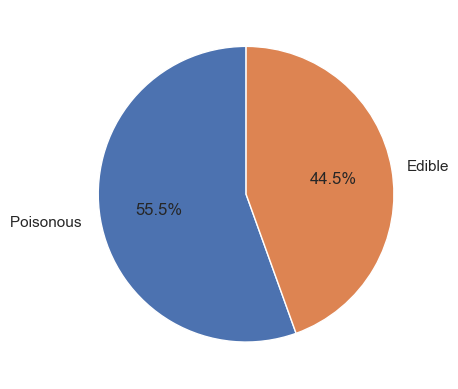

In [100]:
Count_of_classes=mushroom['class'].value_counts()

plt.pie(Count_of_classes,labels=Count_of_classes.index, autopct='%1.1f%%', startangle=90)
plt.show()

###### From above charts the data set is balanced in which 55% of the data is carrying informaiton of poisonous Mushroom and rest is Edible Mushroom

Text(0.5, 1.0, 'Color wise count of classes')

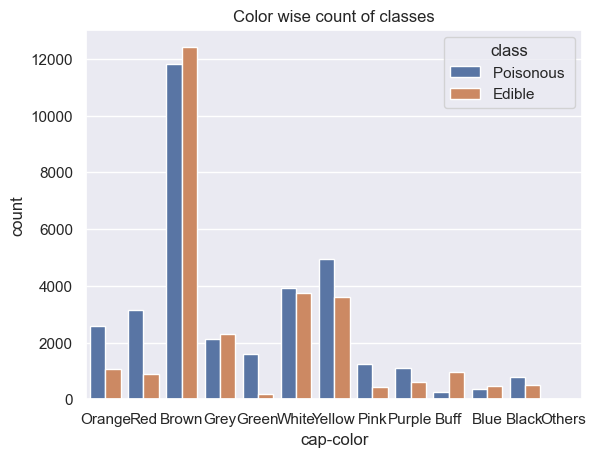

In [53]:
sns.countplot(data=mushroom,hue='class',x='cap-color')
plt.title("Color wise count of classes")

###### Mushroom having Brown Cap-color are majorly present in the dataset is approx 24000 followed by Yellow and White and Mushrooms having blue cap color are less present in the dataset

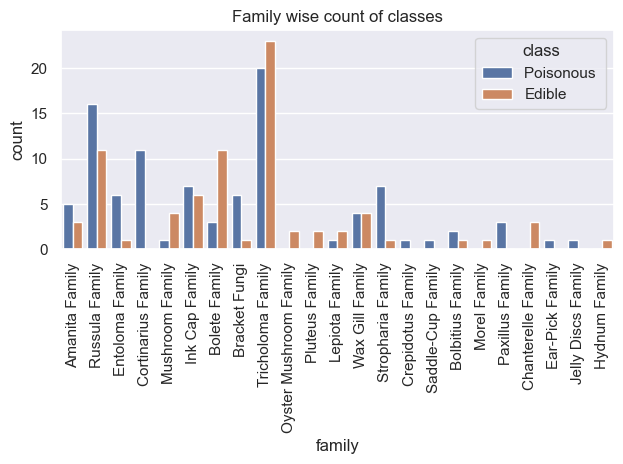

In [54]:
sns.countplot(data=mushroom,hue='class',x='family')
plt.title("Family wise count of classes")
plt.xticks(rotation=90)
plt.tight_layout() 

##### Tricholoma Family has the highest presence comparing al other family..Also from the visualisation we can note Cortinarius Family & Stropharia Family belongs to poisonous Mushroom.

Text(0.5, 1.0, 'Bifurcation of classes with respect to Cap-Shape')

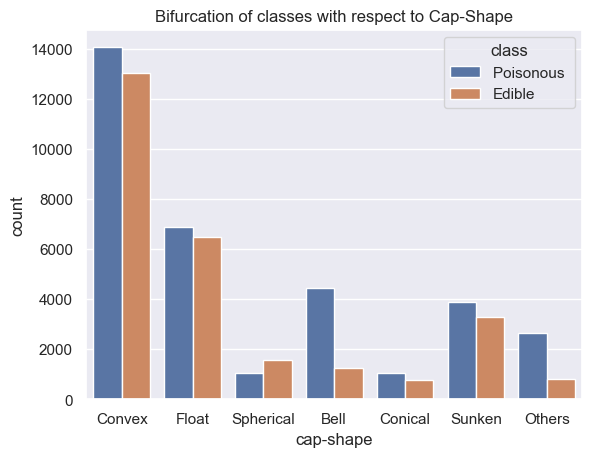

In [398]:
sns.countplot(data=mushroom,x='cap-shape',hue='class')
plt.title("Bifurcation of classes with respect to Cap-Shape")

#####  Most of the mushroom's Cap shaepe in the provided datasets are convex followed by Float. Conical cap shape are the one who is having least presence in the datasets.

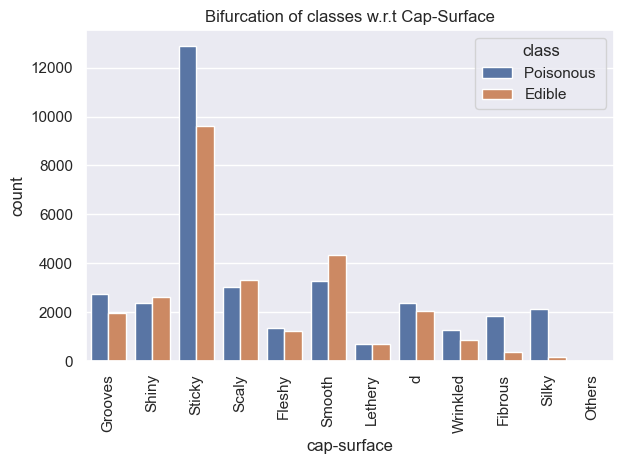

In [401]:
sns.countplot(data=mushroom,x='cap-surface',hue='class')
plt.title("Bifurcation of classes w.r.t Cap-Surface")
plt.xticks(rotation=90)
plt.tight_layout() 

##### From the visualization chart ,Most of the Mushroom's Cap surface are sticky stil the poisonous mushroom coming under Mushroom which are having sticky cap suraface . In the other side Mushroom 🍄  having Smooth Cap surface are edible and have highest occurence with respect to edible mushroom.

Text(0.5, 1.0, 'Bifurcation of Mushroom class w.r.t Bruises/Bleed')

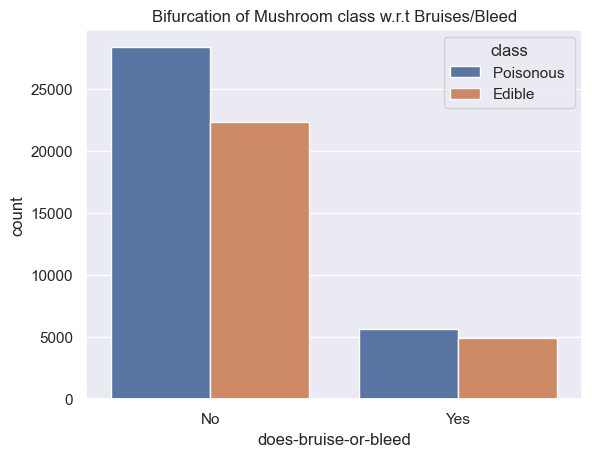

In [402]:
sns.countplot(data=mushroom,x='does-bruise-or-bleed',hue='class')
plt.title("Bifurcation of Mushroom class w.r.t Bruises/Bleed")

##### Seems like mushroom which doent have any bruise/bleed are more which are good to become edible kind .Even though there highest no of poisonous mushroom in dataset.

Text(0.5, 1.0, 'Bifurcation of Mushroom class w.r.t Gill-Attachment')

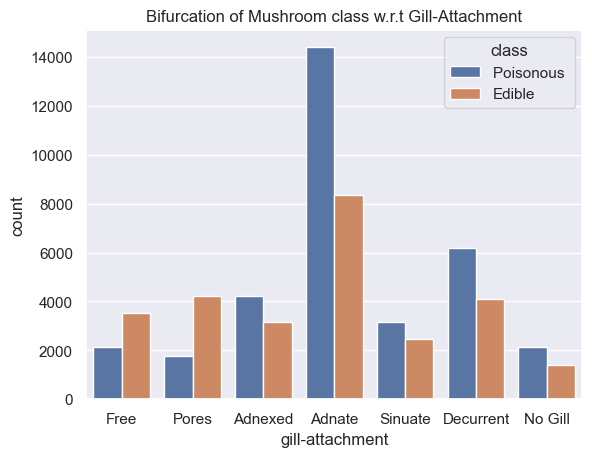

In [403]:
sns.countplot(data=mushroom,x='gill-attachment',hue='class')
plt.title("Bifurcation of Mushroom class w.r.t Gill-Attachment")

###### Adnate kind of gill attachment are having maximum occurance in the dataset followed by decurrent type gill attachement .

Text(0.5, 1.0, 'Bifurcation of Mushroom class w.r.t Gill-Spacing')

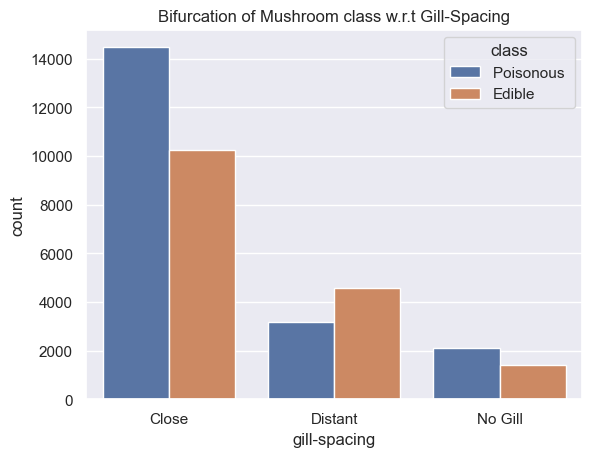

In [419]:
sns.countplot(data=mushroom,x='gill-spacing',hue='class')
plt.title("Bifurcation of Mushroom class w.r.t Gill-Spacing")

######  From the above visualization chart close gill spacing are strongly presence compairing Distance gill speacing .There are  approx 1800 Mushroom which dont have any Gill.

Text(0.5, 1.0, 'Bifurcation of Mushroom class w.r.t Gill-Color')

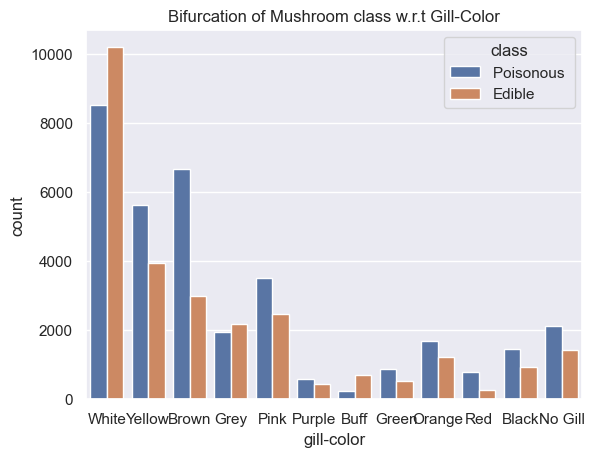

In [405]:
sns.countplot(data=mushroom,x='gill-color',hue='class')
plt.title("Bifurcation of Mushroom class w.r.t Gill-Color")

##### Mushroom having White gill color followed by Brown and yellow are taking the highest position as per the above visuaiation.

Text(0.5, 1.0, 'Bifurcation of Mushroom class w.r.t Stem-Root')

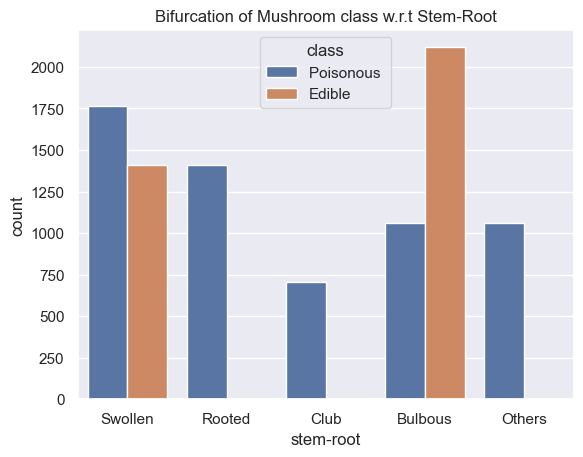

In [421]:
sns.countplot(data=mushroom,x='stem-root',hue='class')
plt.title("Bifurcation of Mushroom class w.r.t Stem-Root")

###### Bulbous kind of stem root are most likely to edible and also carrying highest presence in the datasets.Club ,Rooted & Others kind of mushroom's stem rooted are  clearley indicating poisinous Mushroom 🍄  .

In [425]:
mushroom.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season', 'family', 'name'],
      dtype='object')

Text(0.5, 1.0, 'Bifurcation of Mushroom class w.r.t Stem-Color')

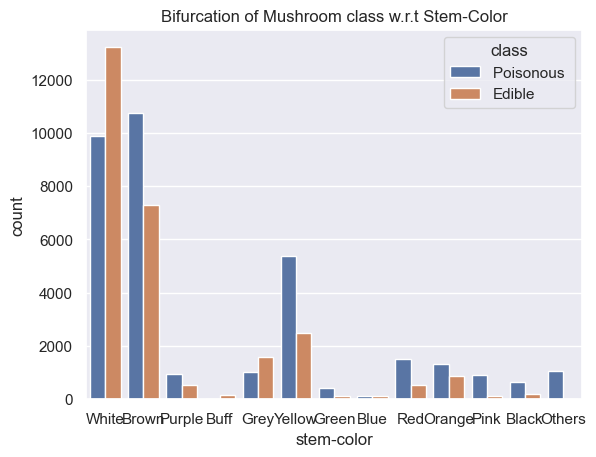

In [406]:
sns.countplot(data=mushroom,x='stem-color',hue='class')
plt.title("Bifurcation of Mushroom class w.r.t Stem-Color")

##### From the above chart we can observe that Mushroom having white stem color has the highest occurance in the dataset  and Mushroom having Blue stem color are rarely present in the datasets.

<Axes: xlabel='veil-type', ylabel='count'>

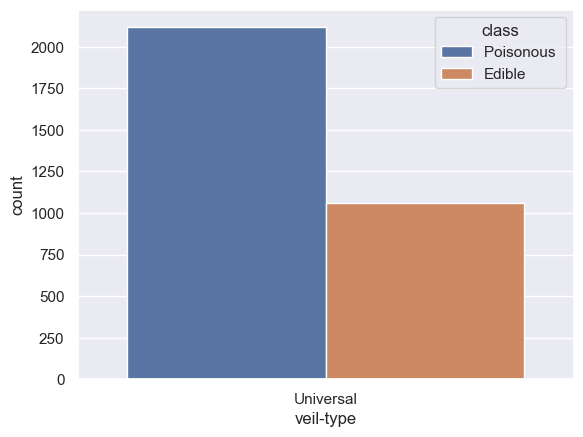

In [64]:

sns.countplot(data=mushroom,x='veil-type',hue='class')

##### If we clearly observce the above chart then only 6 % of data in veil type are there and rest 94% are missing . So this feature is not going to add any value at the time of model building.

Text(0.5, 1.0, 'Bifurcation of Mushroom class w.r.t Veil-Color')

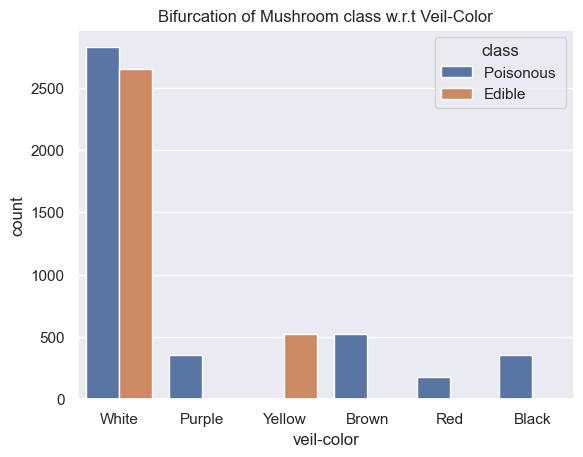

In [422]:
sns.countplot(data=mushroom,x='veil-color',hue='class')
plt.title("Bifurcation of Mushroom class w.r.t Veil-Color")

###### Mushroom's having Black,Purple,brown and Red veil color are clearly seems like to be poisonous only.

Text(0.5, 1.0, 'Bifurcation of Mushroom class w.r.t Has-Ring')

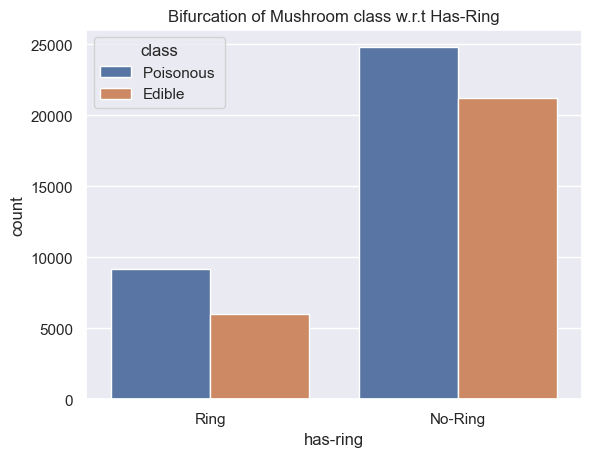

In [408]:
sns.countplot(data=mushroom,x='has-ring',hue='class')
plt.title("Bifurcation of Mushroom class w.r.t Has-Ring")

###### Mushroom having No ring are highly present in  the dataset.classified along with their class.

Text(0.5, 1.0, 'Bifurcation of Mushroom class w.r.t Ring-type')

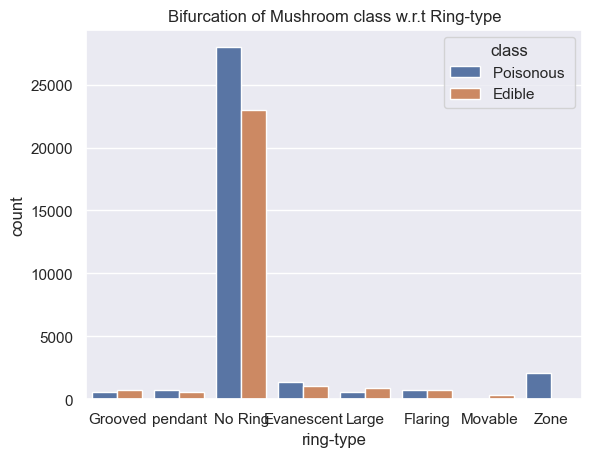

In [409]:
sns.countplot(data=mushroom,x='ring-type',hue='class')
plt.title("Bifurcation of Mushroom class w.r.t Ring-type")

##### Mushroom having No Rings are  strong having highest presence in the dataset

Text(0.5, 1.0, 'Bifurcation of Mushroom class w.r.t Spore print color')

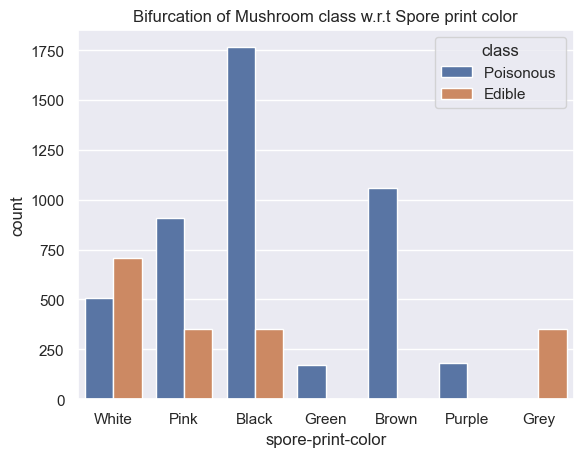

In [423]:
sns.countplot(data=mushroom,x='spore-print-color',hue='class')
plt.title("Bifurcation of Mushroom class w.r.t Spore print color")

###### Mushroom's having Spore of Grey color are safe to have and in the other hand Brown,Green,Purple,Black are poisonous kind. 

Text(0.5, 1.0, 'Bifurcation of Mushroom class w.r.t Habitat')

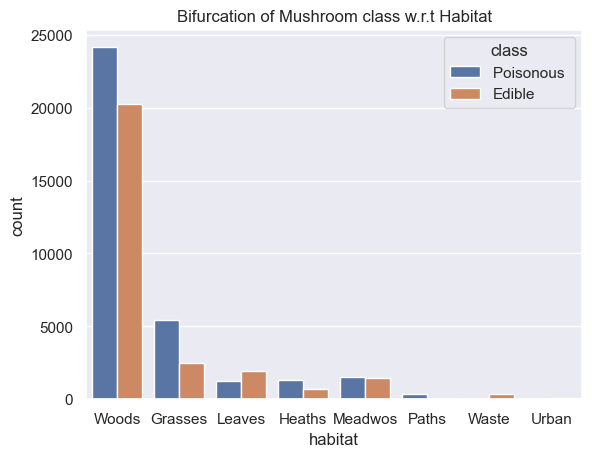

In [411]:
sns.countplot(data=mushroom,x='habitat',hue='class')
plt.title("Bifurcation of Mushroom class w.r.t Habitat")

###### Most of the Mushroom are seems to be come from Woods and Grasses area.

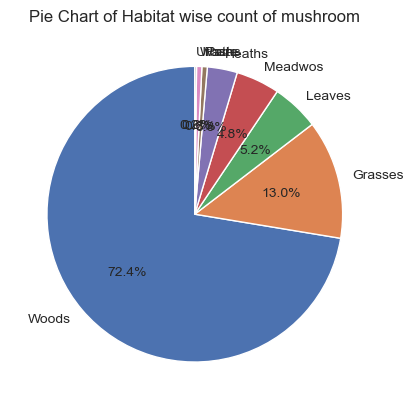

In [97]:
habitat_counts=mushroom['habitat'].value_counts()

plt.pie(habitat_counts,labels=habitat_counts.index,autopct='%1.1f%%', startangle=90,textprops={'fontsize': 10})
plt.title('Pie Chart of Habitat wise count of mushroom')
plt.show()

<Axes: xlabel='season', ylabel='count'>

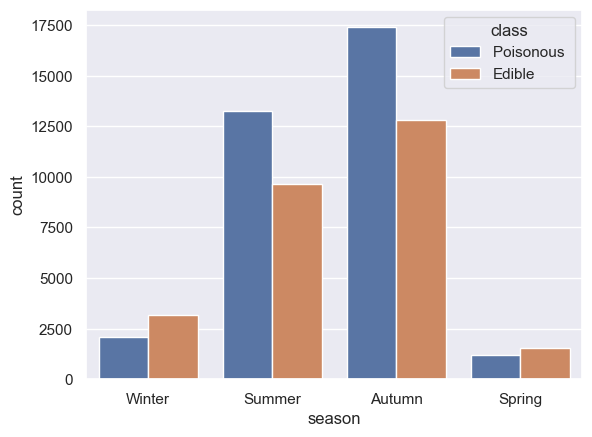

In [70]:
sns.countplot(data=mushroom,x='season',hue='class')
plt.title("Bifurcation of Mushroom class w.r.t Season")

##### As per the above chart we can say "Automn" is the month where we can find most of the mushroom while spring doent have musch produciton to compariing any other season.

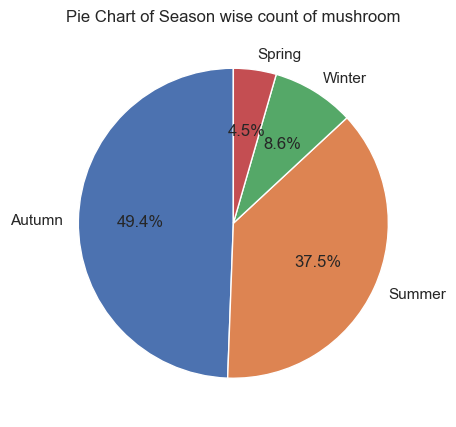

In [91]:
Season_counts = mushroom['season'].value_counts()

plt.figure(figsize=(5,6)) 
plt.pie(Season_counts,labels=Season_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Season wise count of mushroom')
plt.show()

<Axes: xlabel='cap-diameter', ylabel='count'>

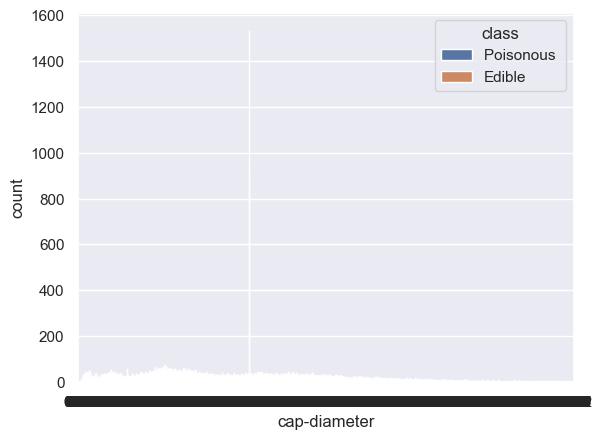

In [395]:
#sns.countplot(data=mushroom,hue='class',x='cap-diameter')

<Axes: xlabel='stem-height', ylabel='count'>

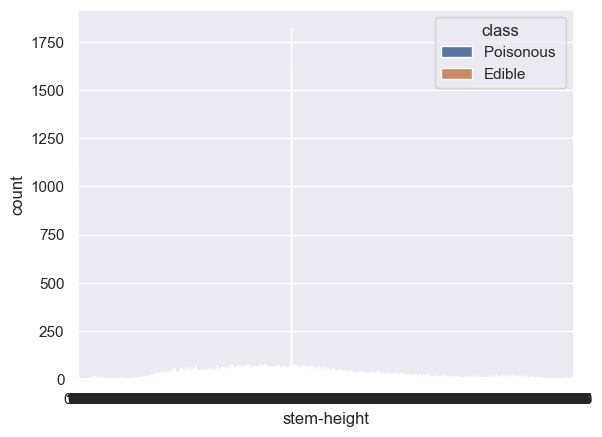

In [396]:
#sns.countplot(data=mushroom,hue='class',x='stem-height')

In [ ]:
#sns.countplot(data=mushroom,hue='class',x='stem-widht')

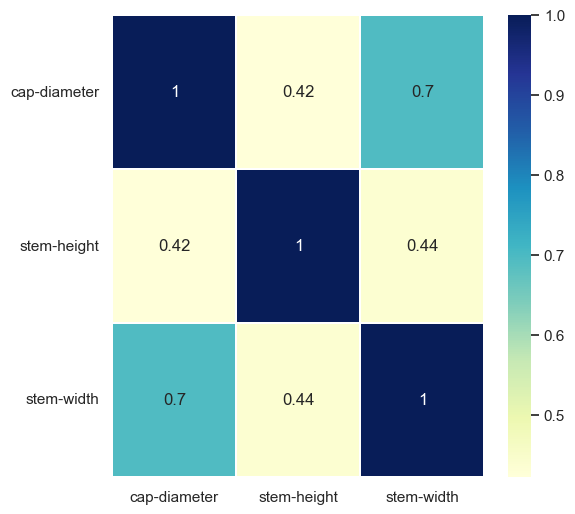

In [77]:
plt.figure(figsize=(6,6))
sns.heatmap(mushroom.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)
plt.show()

###### Observed the correlation between the numeric variables.

Crearting a separate varible for int datatypes to perform some analysis.

In [319]:
Numeric_data=mushroom.select_dtypes(exclude="O")

In [320]:
Numeric_data.columns

Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object')

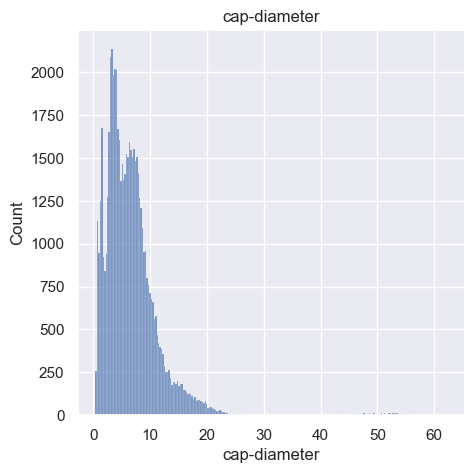

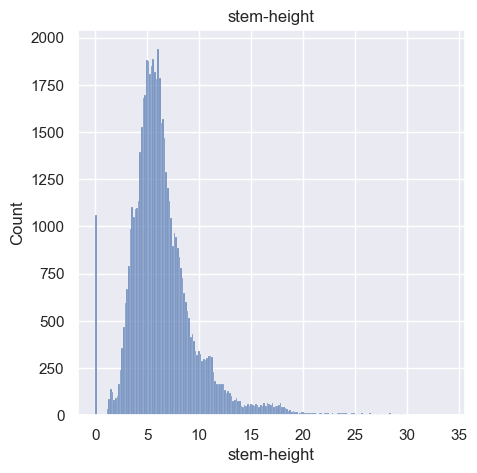

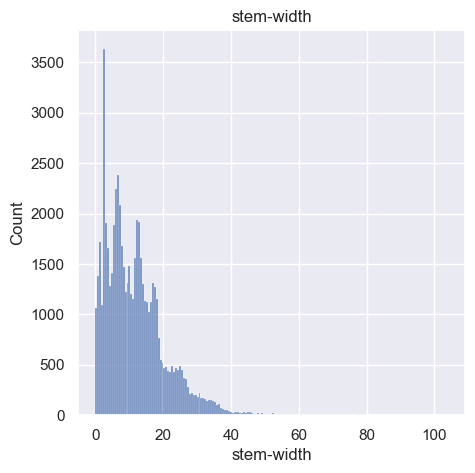

In [115]:
for  i in Numeric_data.columns:
    plt.figure(figsize=(5,5))
    sns.histplot(Numeric_data[i])
    plt.title(i)
    plt.show()

###### We can observed that the graph are right skewed and frequency. To get confirmed upon outlier we will peform Boxpot to check presenece of outliers.

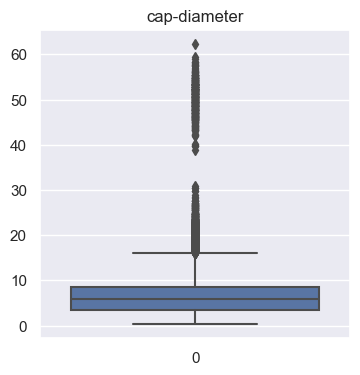

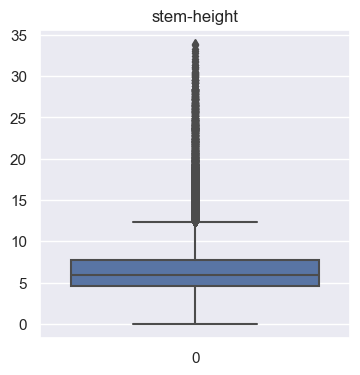

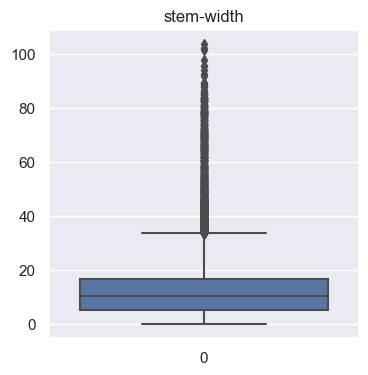

In [116]:
for  i in Numeric_data.columns:
    plt.figure(figsize=(4,4))
    sns.boxplot(Numeric_data[i])
    plt.title(i)
    plt.show()

######  Confirmed that there are some outlier present in the dataset which we will take care before model building.

In [122]:
mushroom.describe(include=object)

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,family,name
count,61242,61070,46950,61070,61069,51185,36006,61069,9531,22945,61069,3177,7413,61069,58598,6354,61069,61069,173,173
unique,2,7,12,13,2,7,3,12,5,8,13,1,6,2,8,7,8,4,23,173
top,Poisonous,Convex,Sticky,Brown,No,Adnate,Close,White,Swollen,Smooth,White,Universal,White,No-Ring,Others,Black,Woods,Autumn,Tricholoma Family,Fly Agaric
freq,33984,26934,8196,24218,50479,12698,24710,18521,3177,6025,22926,3177,5474,45890,48361,2118,44209,30177,43,1


##### Dropping columns which is having missing values morer than 40%

In [138]:
mushroom.isnull().sum()*100/len(mushroom)

class                    0.000000
cap-diameter             0.000000
cap-shape                0.280853
cap-surface             23.336926
cap-color                0.280853
does-bruise-or-bleed     0.282486
gill-attachment         16.421737
gill-spacing            41.207015
gill-color               0.282486
stem-height              0.000000
stem-width               0.282486
stem-color               0.282486
has-ring                 0.282486
ring-type                4.317299
habitat                  0.282486
season                   0.282486
dtype: float64

In [321]:
mushroom.drop(['spore-print-color','veil-color','veil-type','stem-surface','stem-root','family','name','gill-spacing'],axis=1,inplace=True)

##### Imputing missing Values

In [322]:
##Taking care of missing values of Numeric attributes
mushroom['stem-height'].fillna(mushroom['stem-height'].median(),inplace=True) ###For stem-heght
mushroom['stem-width'].fillna(mushroom['stem-width'].median(),inplace=True)  ### For stem-Widht

In [323]:
##Taking care missing values of categorical values

mushroom['cap-shape'].fillna(mushroom['cap-shape'].mode()[0],inplace=True)
mushroom['cap-surface'].fillna(mushroom['cap-surface'].mode()[0],inplace=True)
mushroom['cap-color'].fillna(mushroom['cap-color'].mode()[0],inplace=True)
mushroom['does-bruise-or-bleed'].fillna(mushroom['does-bruise-or-bleed'].mode()[0],inplace=True)
mushroom['gill-attachment'].fillna(mushroom['gill-attachment'].mode()[0],inplace=True)
mushroom['gill-color'].fillna(mushroom['gill-color'].mode()[0],inplace=True)
mushroom['has-ring'].fillna(mushroom['has-ring'].mode()[0],inplace=True)
mushroom['ring-type'].fillna(mushroom['ring-type'].mode()[0],inplace=True)
mushroom['habitat'].fillna(mushroom['habitat'].mode()[0],inplace=True)
mushroom['season'].fillna(mushroom['season'].mode()[0],inplace=True)
mushroom['stem-color'].fillna(mushroom['stem-color'].mode()[0],inplace=True)

###### Taken care of missing values of both numerical& categorical values

In [161]:
categorical_data = mushroom.select_dtypes(include=['object']).columns

In [156]:
def cat_fill(mushroom):
    """
    Fill missing values in categorical columns with their respective modes.
    
    Parameters:
    - mushroom (DataFrame): Input DataFrame with categorical columns.
    
    Returns:
    - DataFrame: DataFrame with missing values in categorical columns filled with mode.
    """
    categorical_data = mushroom.select_dtypes(include=['object']).columns  # Get categorical columns
    
    for col in categorical_data:
        mode_val = mushroom[col].mode()[0]  # Compute mode for the column
        mushroom[col].fillna(mode_val, inplace=True)  # Fill null values with mode
    
    return mushroom

# Example usage:
# mushroom = cat_fill(mushroom)


In [165]:
mushroom.isnull().sum()*100/len(mushroom)

class                   0.0
cap-diameter            0.0
cap-shape               0.0
cap-surface             0.0
cap-color               0.0
does-bruise-or-bleed    0.0
gill-attachment         0.0
gill-color              0.0
stem-height             0.0
stem-width              0.0
stem-color              0.0
has-ring                0.0
ring-type               0.0
habitat                 0.0
season                  0.0
dtype: float64

In [324]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61242 entries, 0 to 61241
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61242 non-null  object 
 1   cap-diameter          61242 non-null  float64
 2   cap-shape             61242 non-null  object 
 3   cap-surface           61242 non-null  object 
 4   cap-color             61242 non-null  object 
 5   does-bruise-or-bleed  61242 non-null  object 
 6   gill-attachment       61242 non-null  object 
 7   gill-color            61242 non-null  object 
 8   stem-height           61242 non-null  float64
 9   stem-width            61242 non-null  float64
 10  stem-color            61242 non-null  object 
 11  has-ring              61242 non-null  object 
 12  ring-type             61242 non-null  object 
 13  habitat               61242 non-null  object 
 14  season                61242 non-null  object 
dtypes: float64(3), obje

In [133]:
mushroom.shape

(61242, 16)

#### Taking Care of Outliers

*Creating funciton to handle missing values of int data type*

In [326]:
def handle_outliers_with_iqr(data,column_name):
    Q1 = mushroom['cap-diameter'].quantile(0.25)
    Q3 = mushroom['cap-diameter'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with median
    mushroom['cap-diameter'] = np.where(mushroom['cap-diameter'] < lower_bound, mushroom['cap-diameter'].median(),mushroom['cap-diameter'])
    mushroom['cap-diameter'] = np.where(mushroom['cap-diameter'] > upper_bound, mushroom['cap-diameter'].median(),mushroom['cap-diameter'])
    
    return mushroom

mushroom=handle_outliers_with_iqr(mushroom, 'cap-diameter')

In [327]:
def handle_outliers_with_iqr2(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with median
    data[column_name] = np.where(data[column_name] < lower_bound, data[column_name].median(), data[column_name])
    data[column_name] = np.where(data[column_name] > upper_bound, data[column_name].median(), data[column_name])
    
    return data

# Call the function
mushroom = handle_outliers_with_iqr2(mushroom, 'stem-height')


In [328]:
def handle_outliers_with_iqr3(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with median
    data[column_name] = np.where(data[column_name] < lower_bound, data[column_name].median(), data[column_name])
    data[column_name] = np.where(data[column_name] > upper_bound, data[column_name].median(), data[column_name])
    
    return data

# Call the function
mushroom = handle_outliers_with_iqr2(mushroom, 'stem-width')


###### Taken care of outlier of Stem-widht,Stem-height and Cap-Diameter.

In [329]:
mushroom.describe()

,cap-diameter,stem-height,stem-width
count,61242.000000,61242.000000,61242.000000
mean,6.031935,6.026022,10.976460
std,3.320205,2.229166,7.422829
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.230000
50%,5.850000,5.950000,10.190000
75%,8.050000,7.220000,15.480000
max,16.120000,12.390000,33.530000


In [330]:
Numeric_data=mushroom.select_dtypes(exclude="O")

##### Checking after outlier treatement with both boxplot and histogram :-

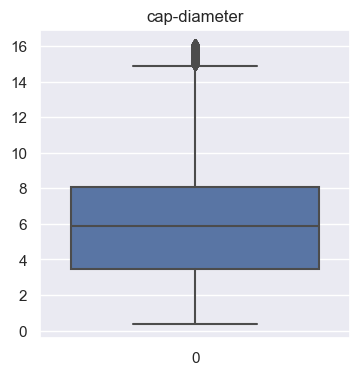

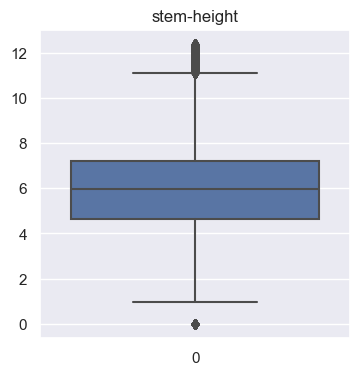

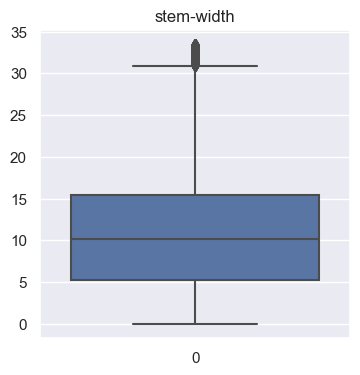

In [331]:
for  i in Numeric_data.columns:
    plt.figure(figsize=(4,4))
    sns.boxplot(Numeric_data[i])
    plt.title(i)
    plt.show()

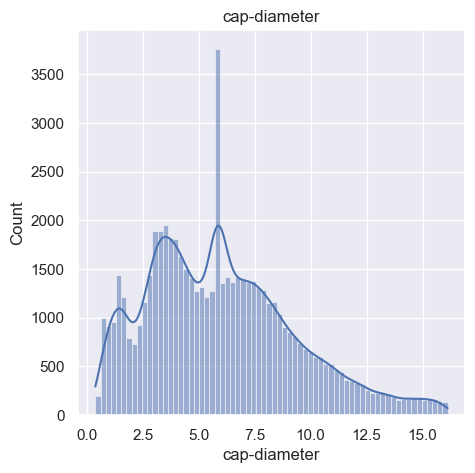

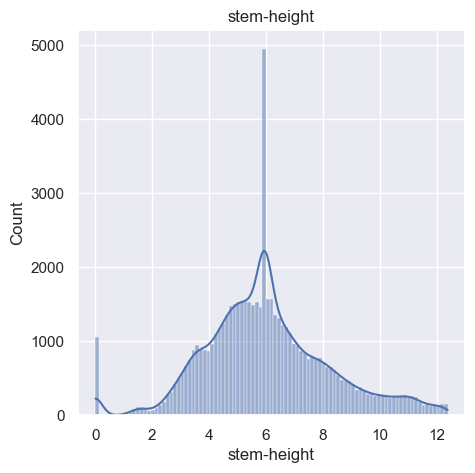

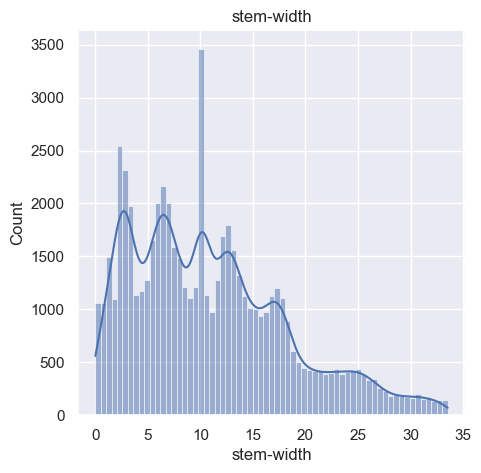

In [332]:
for  i in Numeric_data.columns:
    plt.figure(figsize=(5,5))
    sns.histplot(Numeric_data[i],kde=True)
    plt.title(i)
    plt.show()

### Label Encoding

*Converting all Object data type  features into int data types*

In [333]:
from sklearn.preprocessing  import LabelEncoder

In [334]:
le = LabelEncoder()

In [338]:
df=mushroom.copy()

In [339]:
for col in df.columns:
    df[col]=le.fit_transform(df[col])
    

In [340]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,1482,2,2,6,0,3,10,485,1656,11,1,2,7,3
1,1,1482,2,2,6,0,3,10,485,1750,11,1,7,7,3
2,1,541,2,2,6,0,3,10,485,1766,11,1,2,7,2
3,1,1363,2,2,6,0,3,10,485,1721,11,1,2,7,3
4,1,1373,3,6,10,0,3,10,485,1545,11,1,7,7,3


In [341]:
df.describe()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
count,61242.000000,61242.000000,61242.000000,61242.000000,61242.000000,61242.000000,61242.000000,61242.000000,61242.000000,61242.000000,61242.000000,61242.000000,61242.000000,61242.000000,61242.000000
mean,0.554913,559.186114,2.711489,6.979687,5.889194,0.172921,2.006205,6.840583,494.512981,1045.418438,7.564792,0.247853,4.672610,5.419549,1.050325
std,0.496979,331.997403,1.610510,3.026326,4.169782,0.378182,2.070647,3.809254,218.167611,740.554335,4.224960,0.431769,1.284817,2.675081,1.100440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,304.000000,2.000000,5.000000,2.000000,0.000000,0.000000,4.000000,354.000000,470.000000,2.000000,0.000000,5.000000,3.000000,0.000000
50%,1.000000,541.000000,2.000000,8.000000,5.000000,0.000000,2.000000,7.000000,485.000000,966.000000,11.000000,0.000000,5.000000,7.000000,1.000000
75%,1.000000,761.000000,3.000000,9.000000,11.000000,0.000000,3.000000,10.000000,612.000000,1495.000000,11.000000,0.000000,5.000000,7.000000,2.000000
max,1.000000,1567.000000,6.000000,11.000000,12.000000,1.000000,6.000000,11.000000,1129.000000,3283.000000,12.000000,1.000000,7.000000,7.000000,3.000000


###### Converted and  ready for further processing

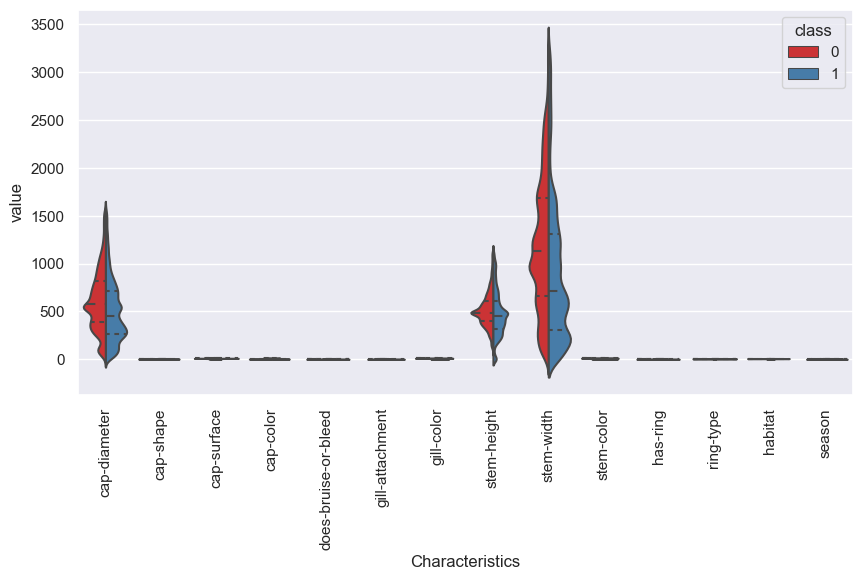

In [343]:
df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

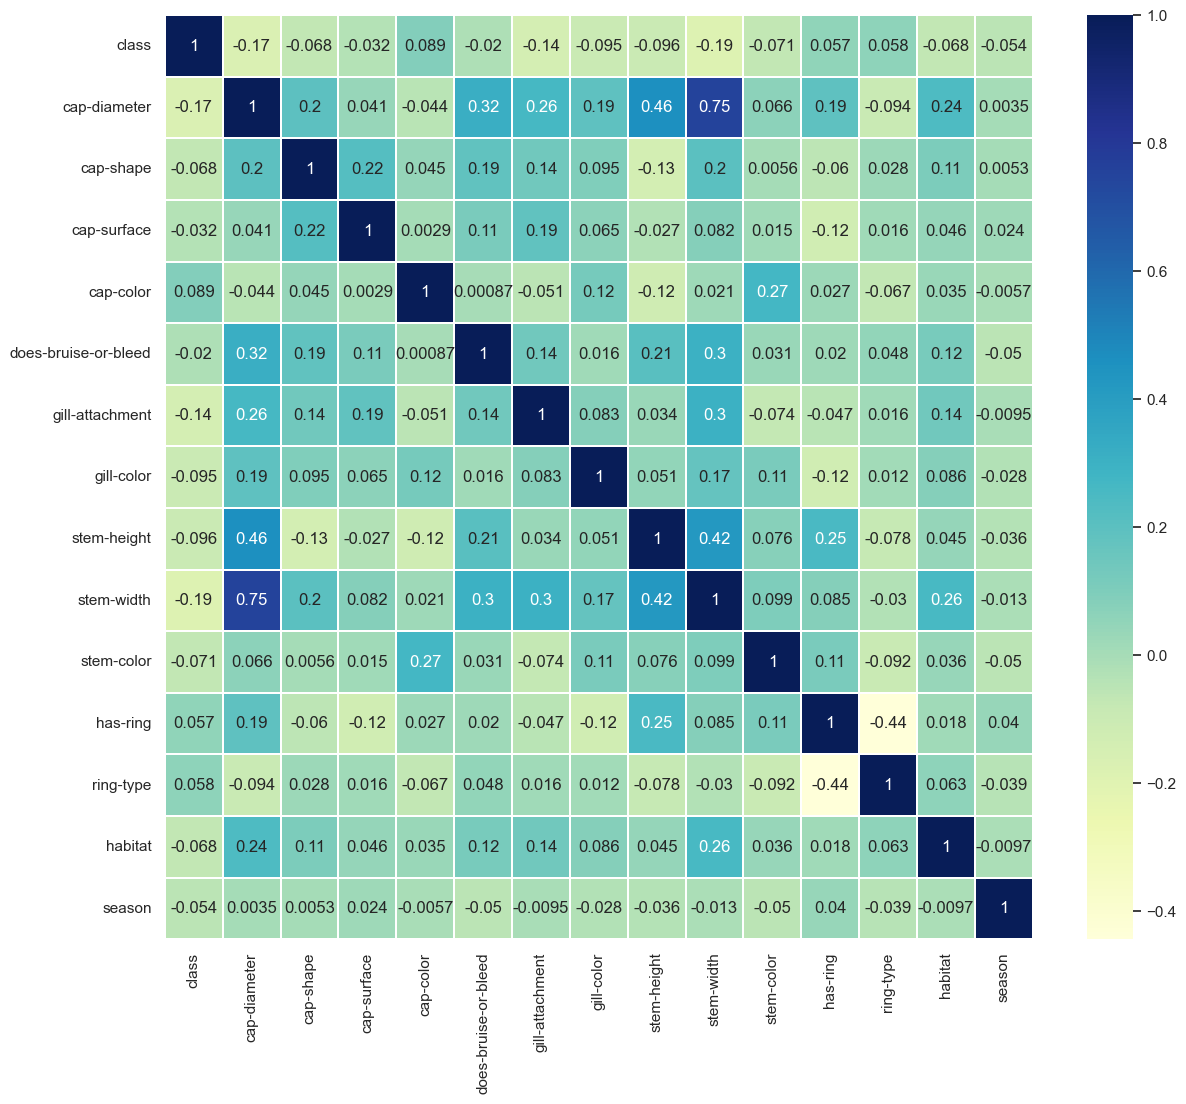

In [344]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

#### Let's Split the data into X & Y

In [345]:
x=df.iloc[:,1:]
y=df['class']

##### To check Feature Importance

In [346]:
from sklearn.ensemble import RandomForestClassifier


In [347]:
model_rf=RandomForestClassifier(n_estimators=100,random_state=42)

In [348]:
model_rf.fit(x,y)

RandomForestClassifier(random_state=42)

In [349]:
fi=model_rf.feature_importances_
feature_importance_df=pd.DataFrame({'Feature':x.columns,'Importance':fi})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                 Feature  Importance
8             stem-width    0.149022
2            cap-surface    0.104210
9             stem-color    0.095536
7            stem-height    0.091488
5        gill-attachment    0.090388
6             gill-color    0.084659
0           cap-diameter    0.082793
3              cap-color    0.070833
1              cap-shape    0.069384
11             ring-type    0.040504
4   does-bruise-or-bleed    0.038480
12               habitat    0.032309
10              has-ring    0.029767
13                season    0.020627


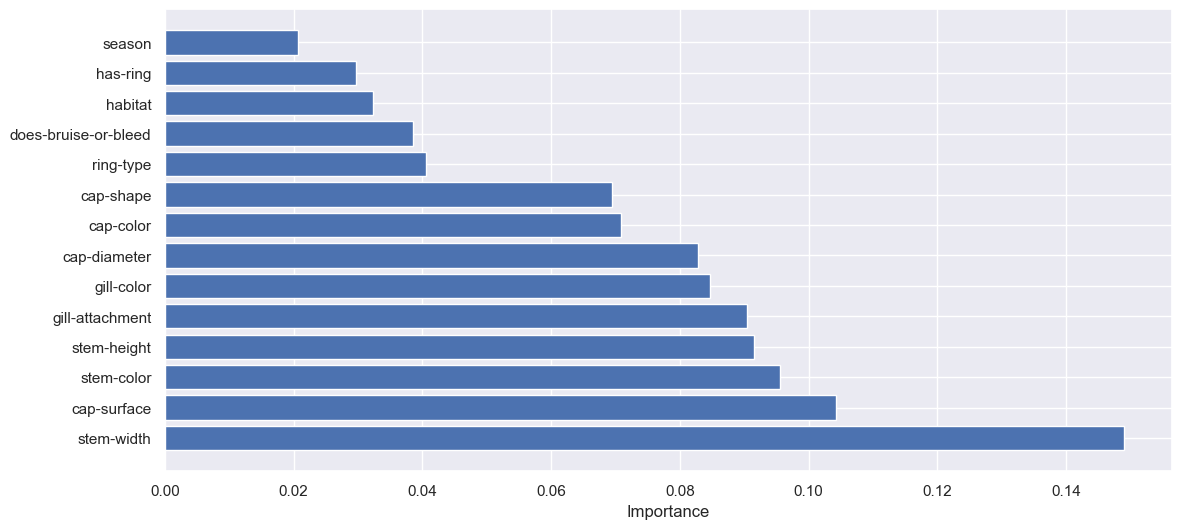

In [350]:
plt.figure(figsize=(13, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.show()

#### Stem-width is the feature which is giving more contribution towards mode building and season is providing less information as per feature importance techniques.

##### Spliting Data set into Train,Test and Split

In [351]:
from sklearn.model_selection import train_test_split

In [352]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.21,random_state=42)

##### Importing standarisation for feauture scaling

##### Scaling the data as we are using linear model and KNN 

In [355]:
from sklearn.preprocessing import StandardScaler

In [360]:

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)


### Model Building part 

##### 1.Performing first with scaled dataset.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,auc,f1_score,classification_report
from sklearn.metrics import roc_curve, auc

In [364]:
dt_classifier = DecisionTreeClassifier(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)
lr_classifier = LogisticRegression(random_state=42, max_iter=1000)  # increased max_iter for convergence
knn_classifier = KNeighborsClassifier()

classifiers = {
    "Decision Tree": dt_classifier,
    "Random Forest": rf_classifier,
    "XGBoost": xgb_classifier,
    "Gradient Boosting": gb_classifier,
    "Logistic Regression": lr_classifier,
    "KNN": knn_classifier
}

# Step 3: Train the models, evaluate on training and test sets
for name, classifier in classifiers.items():
    classifier.fit(x_train_scaled, y_train)
    
    # Training set evaluation
    y_train_pred = classifier.predict(x_train_scaled)
    print(f"Training Set Report of {name}:\n")
    print(f"Classification Report:\n {classification_report(y_train, y_train_pred)}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_train, y_train_pred)}")
    
    # Test set evaluation
    y_test_pred = classifier.predict(x_test_scaled)
    print(f"\nTest Set Report of {name}:\n")
    print(f"Classification Report:\n {classification_report(y_test, y_test_pred)}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_test_pred)}")
    print("-" * 100)

Training Set Report of Decision Tree:

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21559
           1       1.00      1.00      1.00     26822

    accuracy                           1.00     48381
   macro avg       1.00      1.00      1.00     48381
weighted avg       1.00      1.00      1.00     48381

Confusion Matrix:
 [[21540    19]
 [   34 26788]]

Test Set Report of Decision Tree:

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5699
           1       0.99      0.99      0.99      7162

    accuracy                           0.99     12861
   macro avg       0.99      0.99      0.99     12861
weighted avg       0.99      0.99      0.99     12861

Confusion Matrix:
 [[5648   51]
 [  53 7109]]
----------------------------------------------------------------------------------------------------
Training Set Report of Ran

In [365]:
results = []

# Train and evaluate models
for name, classifier in classifiers.items():
    classifier.fit(x_train_scaled, y_train)
    
    # Training set evaluation
    y_train_pred = classifier.predict(x_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Test set evaluation
    y_test_pred = classifier.predict(x_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    results.append([name, train_accuracy, test_accuracy])

In [366]:
results_df = pd.DataFrame(results, columns=['Algorithm', 'Training Accuracy', 'Test Accuracy'],)
print(results_df)

             Algorithm  Training Accuracy  Test Accuracy
0        Decision Tree           0.998905       0.991914
1        Random Forest           0.998905       0.997045
2              XGBoost           0.998078       0.996968
3    Gradient Boosting           0.907216       0.908172
4  Logistic Regression           0.637585       0.632999
5                  KNN           0.995949       0.994635


##### 2.Performing without scaled dataset

#### ROC Curve with Scaled data

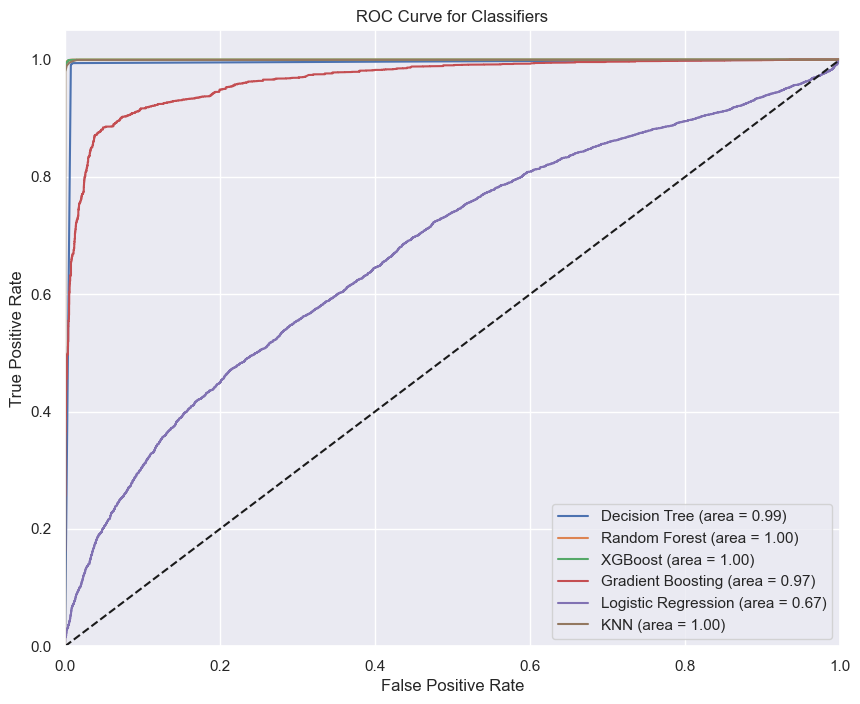

In [367]:
plt.figure(figsize=(10, 8))

for name, classifier in classifiers.items():
    classifier.fit(x_train_scaled, y_train)
    
    if hasattr(classifier, "predict_proba"):
        y_score = classifier.predict_proba(x_test_scaled)[:, 1]
    else:
        y_score = classifier.decision_function(x_test_scaled)
        
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Classifiers')
plt.legend(loc="lower right")
plt.show()

##### Here with Scaled data almost every algithm is giving accuracy of 1 and TPR is 1 except logistic regression model.

#### ROC curve without Scaled data

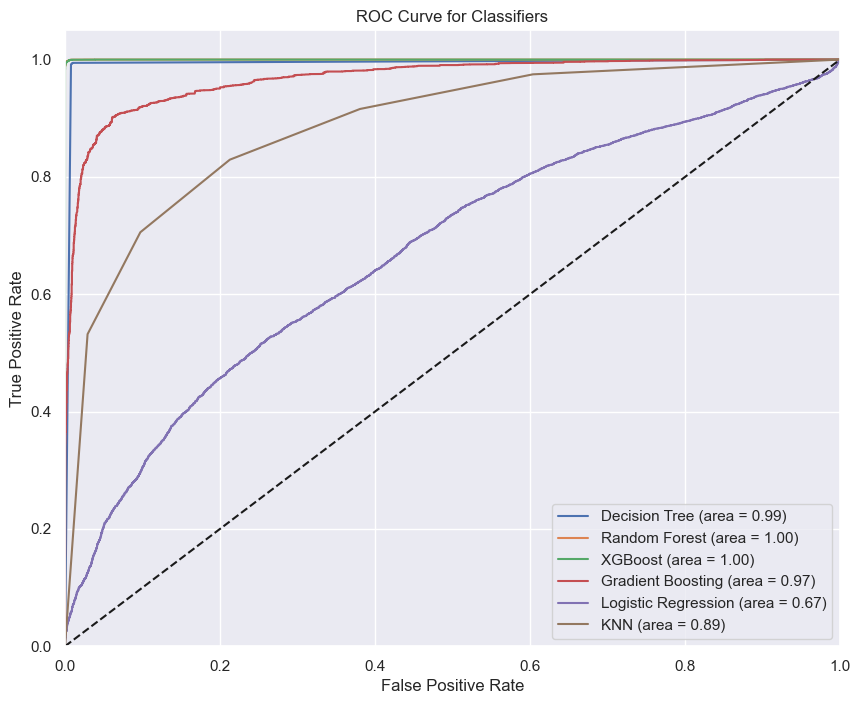

In [248]:
plt.figure(figsize=(10, 8))

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    
    if hasattr(classifier, "predict_proba"):
        y_score = classifier.predict_proba(X_test)[:, 1]
    else:
        y_score = classifier.decision_function(X_test)
        
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Classifiers')
plt.legend(loc="lower right")
plt.show()

##### Here tree based algorithm giving good prediction .All Ensemble technique method model's touching TPR which is 1.

In [254]:
results = []

# Train and evaluate models
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    
    # Training set evaluation
    y_train_pred = classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Test set evaluation
    y_test_pred = classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    results.append([name, train_accuracy, test_accuracy])

In [259]:
results_df = pd.DataFrame(results, columns=['Algorithm', 'Training Accuracy', 'Test Accuracy'],)
print(results_df)

             Algorithm  Training Accuracy  Test Accuracy
0        Decision Tree           0.998905       0.992069
1        Random Forest           0.998905       0.997201
2              XGBoost           0.998098       0.996890
3    Gradient Boosting           0.908766       0.909494
4  Logistic Regression           0.635477       0.631366
5                  KNN           0.869122       0.810746


#### *Acheived 99.8 accuracy so not going for hyperparamter tuning further and saving the model for further use

### Saving the data 

In [369]:
import joblib

In [370]:
joblib.dump(rf_classifier,"Mushroom_Prediction")

['Mushroom_Prediction']

In [371]:
mp=joblib.load("Mushroom_Prediction")

In [389]:
mp.predict([[1,15,2,3,4,5,6,7,8,9,1,22,14,25]])

array([1])

In [391]:
mp.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

array([0])

##### With the help of Joblib i have saved the model ,so everytime i dont have to run the file from the scratch.I have saved Random forest model in the name of "mp" and will call the same model when ever  i have to predict .

### Conclusion :-


**1.Here ,I conclude that Gradient Boosting Regressor algorithm gives the best results as both train and test are not deviating and also the the accuracy score are best in both Train and test cases.**

**2.Exploring the data, we delved deep into its nuances. with visualization techniques also with pandas profiling, we unraveled missing values, scrutinized distribution patterns, and painted a vivid picture of our dataset. The enchanting heatmap unveiled relationships between variables, and the seaborn count plots revealed the distribution of categorical variables across different featuers of mushrooms.**



# Thank you